In [23]:
import pandas as pd
import numpy as np
from Utilities import load_model

In [5]:
import matplotlib.pyplot as plt

In [5]:
tf_idf_vectorizer = load_model("trained_models/tfidf_vectorizer_max50000.all.L1.joblib")
lgrg_L1 = load_model("trained_models/lgreg.all.L1.C0.1.joblib")

### Check for important features in logistic regression

In [6]:
tfidf_feature_names = tf_idf_vectorizer.get_feature_names()
sentiment_metric_names = ["corpus_score_sum", "corpus_score_ave", "negative_ratio", "most_negative_score", "word_num", "sentence_num", "num_of_question_mark", "num_of_exclaimation_mark"]
company_response_type = ["company_response_Closed", "company_response_Closed with explanation", "company_response_Closed with monetary relief", "company_response_Closed with non-monetary relief"]


In [32]:
lgrg_L1.coef_.T[1]

array([0.])

In [67]:
def get_nonzero_coef_names(lgrg_model, tfid_feature_names, sentiment_metric_names, company_response_type):
    """Get the feature names where logistic regression coefs are not zero"""
    nonzero_coefs = []
    abs_nonzero_coefs = []
    indexes = []
    feature_names = []
    for i in np.arange(len(lgrg_L1.coef_.T)):
        coef = lgrg_L1.coef_.T[i][0]
        
        if abs(coef) > 1e-8:
            nonzero_coefs.append(coef)
            abs_nonzero_coefs.append(abs(coef))
            indexes.append(i)
            if i < len(tfid_feature_names):
                feature_names.append(tfid_feature_names[i])
            elif i < (len(tfid_feature_names) + len(sentiment_metric_names)):
                feature_names.append(sentiment_metric_names[i - len(tfid_feature_names)])
            else:
                feature_names.append(company_response_type[i - len(sentiment_metric_names) - len(tfid_feature_names)])
                
    df = pd.DataFrame()
    df["index"] = indexes
    df["nonzero_coef"] = nonzero_coefs
    df["nonzero_abs_coef"] = abs_nonzero_coefs
    df["feature_names"] = feature_names
    
    return df
                

In [68]:
important_features = get_nonzero_coef_names(lgrg_L1,
                                            tfidf_feature_names,
                                            sentiment_metric_names,
                                            company_response_type)

In [69]:
len(important_features)

310

In [87]:
sorted_important_features = important_features.sort_values(by=["nonzero_abs_coef"], ascending=False)

In [90]:
sorted_important_features[:20]

,index,nonzero_coef,nonzero_abs_coef,feature_names
267,44887,7.232970,7.232970,tcpa
245,41143,3.736539,3.736539,scottrade
18,2712,3.416254,3.416254,american express
102,15883,2.989087,2.989087,equifax
270,45104,-2.833702,2.833702,thank
27,3739,2.324839,2.324839,attached
194,32645,-2.195305,2.195305,payday
110,16688,2.187422,2.187422,failed
222,37498,2.123806,2.123806,refuse
49,7282,2.055631,2.055631,cfpb


### Interesting part of these important features. 

- tcpa is "(Telephone Consumer Protection Act) is a federal statute enacted in 1991 designed to safeguard consumer privacy."
- american express is the company with highest dispute rate in the EDA result
- equifax is the company with highest dispute number in the EDA result
- words like failed, illege, violated, refused, fraud make sense to contribute to whether escalate or not


(array([  3.,  24., 138., 112.,  28.,   2.,   2.,   0.,   0.,   1.]),
 array([-2.83370184, -1.82703462, -0.8203674 ,  0.18629982,  1.19296703,
         2.19963425,  3.20630147,  4.21296869,  5.21963591,  6.22630313,
         7.23297034]),
 <a list of 10 Patch objects>)

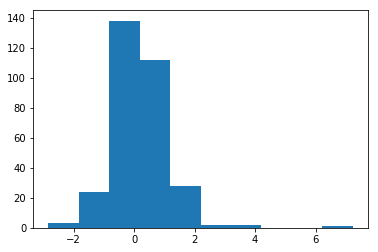

In [71]:
plt.hist(important_features["nonzero_coef"])

### Check important feature in Logistic regression L2

In [55]:
lgrg = load_model("trained_models/lgreg.all.joblib")
tfidf = load_model("trained_models/tfidf_vectorizer_max50000.all.joblib")

In [59]:
tfidf_feature_names_L2 = tfidf.get_feature_names()

In [61]:
coefs_L2 = get_nonzero_coef_names(lgrg, tfidf_feature_names_L2, sentiment_metric_names,company_response_type)

In [84]:
coefs_L2_sorted = coefs_L2.sort_values(by=["nonzero_abs_coef"], ascending=False)

In [85]:
coefs_L2_sorted.head(20)

,index,nonzero_coef,nonzero_abs_coef,feature_names
44920,45104,-2.833702,2.833702,thank
32509,32645,-2.195305,2.195305,payday
39118,39280,-1.911323,1.911323,request investigate
20479,20579,-1.757667,1.757667,husband
44379,44560,-1.654418,1.654418,sure
19716,19814,-1.466951,1.466951,help
42854,43030,-1.445660,1.445660,speak
48709,48908,-1.414781,1.414781,went
40584,40750,-1.389766,1.389766,sale date
42623,42799,-1.382292,1.382292,situation


### Check the feature names with highest tf-idf score

In [24]:
from joblib import load
def load_model(saved_model_file):
    with open(saved_model_file, 'rb') as f:
        temp_model = load(f)
    return temp_model

In [25]:
tf_idf_file = "trained_models/tfidf_vectorizer_max50000.for_escalation_classifier.joblib"
x = pd.read_csv("data/narrative_preprocessed.for_escalation_prediction.csv")

In [26]:
tf_idf_model = load_model(tf_idf_file)
X_vectorized = tf_idf_model.transform(x["processed_narrative"])

In [27]:
def print_max_tf_idf_features(x_vectorized):
    index_sorted_by_tfidf = x_vectorized.max(axis=0).toarray().ravel().argsort()
    feature_names = np.array(tf_idf_model.get_feature_names())
    print("features with lowest tf_idf: ")
    print(feature_names[index_sorted_by_tfidf[:100]])
    print("features with highest tf_idf: ")
    print(feature_names[index_sorted_by_tfidf[-100:]])

In [28]:
print_max_tf_idf_features(X_vectorized)

features with lowest tf_idf: 
['subsection section check' 'construed requiring consumer'
 'described section title' 'method payment beginning'
 'fund transfer similar' 'transfer similar method'
 'similar method payment' 'notice consumer decision'
 'consumer decision block' 'approving processing negotiable'
 'service company acting' 'obtained resale' 'company acting issue'
 'provision section not' 'instrument electronic'
 'instrument electronic fund' 'purpose approving processing'
 'approving processing' 'processing negotiable'
 'processing negotiable instrument' 'negotiable instrument electronic'
 'section shall construed' 'title information identified'
 'information obtained resale' 'authorization purpose approving'
 'apply check service' 'acting issue' 'issue authorization purpose'
 'acting issue authorization' 'company provision section'
 'verification company provision' 'shall contain address'
 'promptly provide notice' 'paragraph reseller shall'
 'obligation paragraph reseller' 'f

### Survey the effect of sentiment metrics
Check where these metrics can differentiate dispute from non-dispute

In [29]:
sentiment = pd.read_csv("data/complaints_with_sentiment_metric.csv")
sentiment.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,corpus_score_sum,corpus_score_ave,negative_ratio,most_negative_score,word_num,sentence_num,num_of_question_mark,num_of_exclaimation_mark,company_response,dispute
0,08/25/15,Bank account or service,Checking account,Problems caused by my funds being low,None,I have a complaint regarding the overdraft fee...,Company chooses not to provide a public response,"FLAGSTAR BANK, FSB",MI,480XX,...,-0.7086,-0.088575,0.500000,-0.2960,124,8,0,0,Closed with explanation,0
1,08/25/15,Credit reporting,None,Incorrect information on credit report,Account terms,XXXX Collections Account # XXXX is reporting o...,None,"EQUIFAX, INC.",LA,708XX,...,-0.1756,-0.087800,0.500000,-0.5574,55,2,0,0,Closed with explanation,0
2,08/25/15,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",None,I just filled this out but web site timed out ...,None,"Seterus, Inc.",CA,926XX,...,-0.0298,-0.001568,0.315789,-0.5859,422,19,0,4,Closed with explanation,0
3,08/25/15,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Right to dispute notice not received,This file has been relisted on my credit repor...,Company believes it acted appropriately as aut...,ERC,FL,None,...,0.1318,0.018829,0.142857,-0.2500,123,7,0,0,Closed with non-monetary relief,0
4,08/25/15,Mortgage,Home equity loan or line of credit,"Loan modification,collection,foreclosure",None,We took out a HELOC XXXX years ago. We thought...,Company believes it acted appropriately as aut...,Ditech Financial LLC,FL,None,...,1.1912,0.170171,0.142857,-0.1280,184,7,0,0,Closed with explanation,0


In [30]:
sentiment_metrics = sentiment.loc[:, ['Complaint ID',
       'corpus_score_sum', 'corpus_score_ave', 'negative_ratio',
       'most_negative_score', 'word_num', 'sentence_num',
       'num_of_question_mark', 'num_of_exclaimation_mark', 'company_response',
       'dispute']]
sentiment_metrics.head()

,Complaint ID,corpus_score_sum,corpus_score_ave,negative_ratio,most_negative_score,word_num,sentence_num,num_of_question_mark,num_of_exclaimation_mark,company_response,dispute
0,1535719,-0.7086,-0.088575,0.500000,-0.2960,124,8,0,0,Closed with explanation,0
1,1535563,-0.1756,-0.087800,0.500000,-0.5574,55,2,0,0,Closed with explanation,0
2,1535476,-0.0298,-0.001568,0.315789,-0.5859,422,19,0,4,Closed with explanation,0
3,1534483,0.1318,0.018829,0.142857,-0.2500,123,7,0,0,Closed with non-monetary relief,0
4,1535621,1.1912,0.170171,0.142857,-0.1280,184,7,0,0,Closed with explanation,0


In [31]:
dispute_group = sentiment_metrics[sentiment_metrics["dispute"] == 1]
no_dispute_group = sentiment_metrics[sentiment_metrics["dispute"] == 0]
print("Ratio of dispute / no_dispute is ", len(dispute_group) / len(no_dispute_group))

Ratio of dispute / no_dispute is  0.2815129354407486


#### Draw distribution and run T-test on each metric column between dispute group and non-dispute group

In [36]:
from scipy import stats
def plot_distribution(column_name):
    plt.figure()
    #no_dispute_group[column_name].plot.hist(bins=25, alpha = 0.5)
    #dispute_group[column_name].plot.hist(bins = 25, stacked = True)
    sentiment_metrics.boxplot(by="dispute", column=[column_name])
    #no_dispute_group[column_name].plot.box()
    #dispute_group[column_name].plot.box(stacked = True)
    plt.xlabel(column_name)
    plt.show()
    
    # run t-test
    ttest = stats.ttest_ind(no_dispute_group[column_name], dispute_group[column_name])
    print(ttest)

In [33]:
columns = list(sentiment_metrics.columns)
print(columns)

['Complaint ID', 'corpus_score_sum', 'corpus_score_ave', 'negative_ratio', 'most_negative_score', 'word_num', 'sentence_num', 'num_of_question_mark', 'num_of_exclaimation_mark', 'company_response', 'dispute']


In [34]:
for x in ["Complaint ID", "company_response", "dispute"]:
    columns.remove(x) 

distribution of  corpus_score_sum


<Figure size 432x288 with 0 Axes>

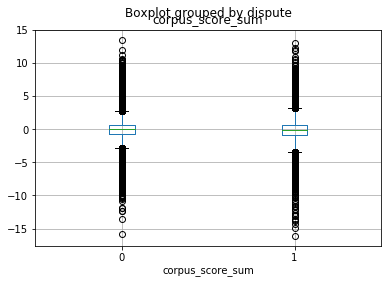

Ttest_indResult(statistic=7.021867343722565, pvalue=2.1977312189594587e-12)
distribution of  corpus_score_ave


<Figure size 432x288 with 0 Axes>

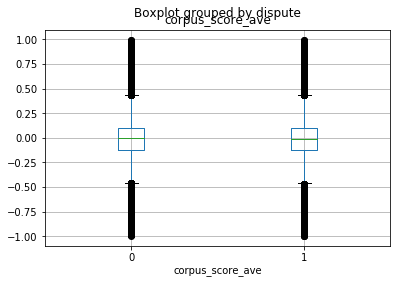

Ttest_indResult(statistic=7.086952972487009, pvalue=1.3764940860664484e-12)
distribution of  negative_ratio


<Figure size 432x288 with 0 Axes>

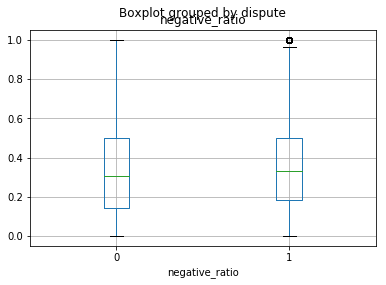

Ttest_indResult(statistic=-10.882340833788856, pvalue=1.4301602918979648e-27)
distribution of  most_negative_score


<Figure size 432x288 with 0 Axes>

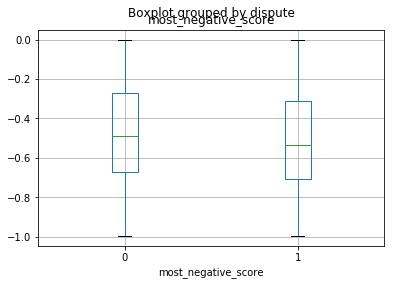

Ttest_indResult(statistic=28.709766798409873, pvalue=8.162426226324658e-181)
distribution of  word_num


<Figure size 432x288 with 0 Axes>

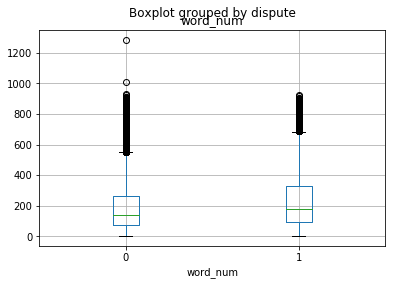

Ttest_indResult(statistic=-38.252410291234, pvalue=0.0)
distribution of  sentence_num


<Figure size 432x288 with 0 Axes>

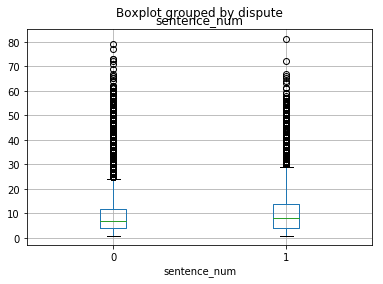

Ttest_indResult(statistic=-32.019202702493025, pvalue=2.945029749374185e-224)
distribution of  num_of_question_mark


<Figure size 432x288 with 0 Axes>

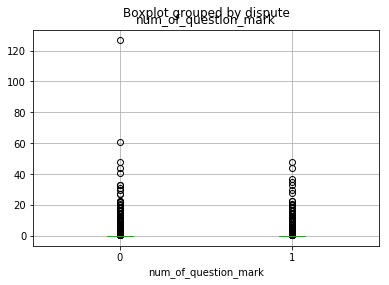

Ttest_indResult(statistic=-9.97960556543321, pvalue=1.9013641335987864e-23)
distribution of  num_of_exclaimation_mark


<Figure size 432x288 with 0 Axes>

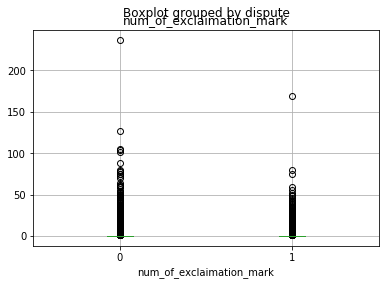

Ttest_indResult(statistic=-6.013233002952856, pvalue=1.822444048320951e-09)


In [37]:
for name in columns:
    print("distribution of ", name)
    plot_distribution(name)

#### Correlation among sentiment metrics and with dispute

In [38]:
sentiment_metrics.corr()

,Complaint ID,corpus_score_sum,corpus_score_ave,negative_ratio,most_negative_score,word_num,sentence_num,num_of_question_mark,num_of_exclaimation_mark,dispute
Complaint ID,1.000000,0.008396,0.012450,-0.004278,0.016016,-0.011666,-0.013638,-0.008361,-0.009411,-0.053100
corpus_score_sum,0.008396,1.000000,0.658390,-0.532868,0.451992,-0.031374,-0.040222,0.014540,-0.015870,-0.017391
corpus_score_ave,0.012450,0.658390,1.000000,-0.801126,0.579473,0.015689,0.016607,0.016767,0.002761,-0.017553
negative_ratio,-0.004278,-0.532868,-0.801126,1.000000,-0.541554,-0.028592,-0.083288,-0.036161,-0.023982,0.026947
most_negative_score,0.016016,0.451992,0.579473,-0.541554,1.000000,-0.461352,-0.429284,-0.091578,-0.120626,-0.070939
word_num,-0.011666,-0.031374,0.015689,-0.028592,-0.461352,1.000000,0.904647,0.216921,0.212536,0.094334
sentence_num,-0.013638,-0.040222,0.016607,-0.083288,-0.429284,0.904647,1.000000,0.249773,0.241229,0.079067
num_of_question_mark,-0.008361,0.014540,0.016767,-0.036161,-0.091578,0.216921,0.249773,1.000000,0.620769,0.024713
num_of_exclaimation_mark,-0.009411,-0.015870,0.002761,-0.023982,-0.120626,0.212536,0.241229,0.620769,1.000000,0.014894
dispute,-0.053100,-0.017391,-0.017553,0.026947,-0.070939,0.094334,0.079067,0.024713,0.014894,1.000000


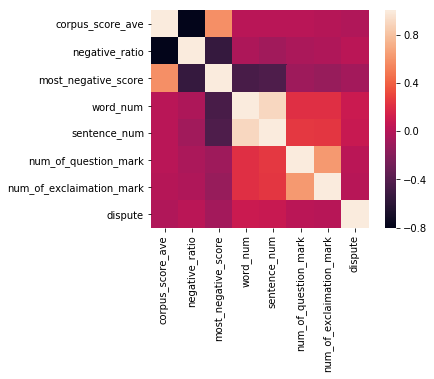

In [40]:
import seaborn as sns
correlation = sentiment_metrics.iloc[:, 2:].corr()
sns.heatmap(correlation, square=True)

word_num and sentence_num are quite correlated, keep one.  negative_ratio and corpus_score_ave are also highly correlated. 